In [17]:
import sys, os
import numpy as np
from keras.preprocessing import image
from keras.models import Model
sys.path.append("src")

from keras.models import load_model
from keras.applications.vgg16 import VGG16 
from keras.applications.vgg16 import preprocess_input

In [12]:
import cv2
def extract_color_histogram(image, bins=(64, 64, 64)):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,
        [0, 180, 0, 256, 0, 256])

    if imutils.is_cv2():
        hist = cv2.normalize(hist)
    else:
        cv2.normalize(hist, hist)

    return hist.flatten()

In [26]:
from timeit import default_timer as timer

print("Loading VGG16 pre-trained model...")
base_model = VGG16(weights='imagenet')
model = Model(input=base_model.input,
              output=base_model.get_layer('block4_pool').output)

# ================================================
# Read images and convert them to feature vectors
# ================================================
imgs, filename_heads, X = [], [], []
path = "C:\\Users\\Java\Desktop\\Missingdogphoto"
query = "C:\\Users\\Java\\Desktop\\annoying\\query"
print("Reading images from '{}' directory...\n".format(path))
start = timer()
for f in os.listdir(query):

        # Process filename
        filename = os.path.splitext(f)  # filename in directory
        filename_full = os.path.join(query,f)  # full path filename
        head, ext = filename[0], filename[1]
        if ext.lower() not in [".png",".jpg", ".jpeg"]:
            continue

        # Read image file
        img = image.load_img(filename_full, target_size=(224, 224))  # load
        imgs.append(np.array(img))  # image
        filename_heads.append(head)  # filename head

        # Pre-process for model input
        img = image.img_to_array(img)  # convert to array
        img = np.expand_dims(img, axis=0)
        features = preprocess_input(img).flatten()
        #features = model.predict(img).flatten()  # features
        X.append(features)  # append feature extractor


for f in os.listdir(path):

    # Process filename
    filename = os.path.splitext(f)  # filename in directory
    filename_full = os.path.join(path,f)  # full path filename
    head, ext = filename[0], filename[1]
    if ext.lower() not in [".png",".jpg", ".jpeg"]:
        continue

    # Read image file
    img = image.load_img(filename_full, target_size=(224, 224))  # load
    imgs.append(np.array(img))  # image
    filename_heads.append(head)  # filename head

    # Pre-process for model input
    img = image.img_to_array(img)  # convert to array
    img = np.expand_dims(img, axis=0)
    features = preprocess_input(img).flatten()
    #features = model.predict(img).flatten()  # features
    X.append(features)  # append feature extractor

X = np.array(X)  # feature vectors
imgs = np.array(imgs)  # images
print("imgs.shape = {}".format(imgs.shape))
print("X_features.shape = {}\n".format(X.shape))

Loading VGG16 pre-trained model...


C:\Users\Java\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("bl..., inputs=Tensor("in...)`
  


Reading images from 'C:\Users\Java\Desktop\Missingdogphoto' directory...

imgs.shape = (5684, 224, 224, 3)
X_features.shape = (5684, 150528)



In [3]:
 import shutil
# def copyfile(path):
#     for p in path:
#         filename = list(p.items())[0][1]
#         filepath =os.path.join("D:\\BB105Project\\artificio\\similar_images_TL\\Missingdogphoto",filename)
#         dst = os.path.join("D:\\BB105Project\\artificio\\similar_images_TL\\similarity",filename)
#         if not os.path.exists(dst):
#             shutil.copyfile(filepath, dst)
def copyfile(path):
    for p in path:
        filename = p
        filepath =os.path.join("D:\\BB105Project\\artificio\\similar_images_TL\\Missingdogphoto",filename)
        dst = os.path.join("D:\\BB105Project\\artificio\\similar_images_TL\\similarity",filename)
        if not os.path.exists(dst):
            shutil.copyfile(filepath, dst)

In [4]:
filename[0]

'10703151005012'

In [27]:
from annoy import AnnoyIndex
import random
from timeit import default_timer as timer

a = len(filename_heads)
f = 150528
t = AnnoyIndex(f)  # Length of item vector that will be indexed
for i in range(len(filename_heads)):
     v = X[i]
    
     t.add_item(i, v)

t.build(50) # 10 trees
# t.save('test.ann')

# # ...

# u = AnnoyIndex(f)
# u.load('test.ann') # super fast, will just mmap the file
print(t.get_nns_by_item(0, 10)) # will find the 1000 nearest neighbors

end = timer()
print("Total {}  minutes".format(0.1*round((end - start)/6)))

[0, 2440, 4216, 556, 1711, 3277, 4312, 1656, 5558, 1855]
Total 1.6  minutes


In [6]:
[filename_heads[x] for x in t.get_nns_by_item(0, 20)]

['German shepherd44',
 '10505090201018',
 '10609251004002',
 '10601130201002',
 '10509050601003',
 '10510191005004',
 '10504281002001',
 '10506210601022',
 '10601161005013',
 '10506041601007',
 '10506200601010',
 '10511091005011',
 '10603010201003',
 '10506290601018',
 '10603231002001',
 '10609200601007',
 '10512281801001',
 '10701080601024',
 '10505230201008',
 '10509080601039']

<Figure size 432x288 with 0 Axes>

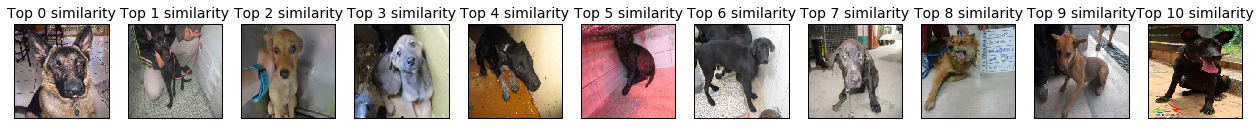

In [23]:
import matplotlib.pyplot as plt
n = 11
plt.clf()
plt.figure(figsize=(2*n,4))
  

# Plot answer images
for j, img in enumerate([imgs[x] for x in t.get_nns_by_item(0, 11)]):
    if (j >= n):
        break
    
    ax = plt.subplot(2, n, n + j +1 )  # display original
    plt.imshow(img)
#     if gray_scale:
#         plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(1)  # set border thickness
        ax.spines[axis].set_color('black')  # set to black
    ax.set_title("Top %d similarity" % (j), fontsize=14)  # set subplot title
    
plt.savefig('similarity.png')
plt.show()



In [7]:
#!pip install annoy

In [8]:
#from annoy import AnnoyIndex
#u = AnnoyIndex(100352)
#u.load('test.ann') # super fast, will just mmap the file
#print(u.get_nns_by_item(0, 20)) # will find the 1000 nearest neighbors

# 安裝 windows Visual C++ Visual Studio Build Tools
!pip install annoy


In [9]:
vec = [0.5737922191619873,
 -1.9293583631515503,
 1.0164695978164673,
 -1.280510425567627,
 -1.3983397483825684,
 1.3804190158843994,
 -0.427237868309021,
 0.1451399326324463,
 0.7934267520904541,
 0.7231346368789673,
 0.9676925539970398,
 -0.5338568687438965,
 -0.4000062048435211,
 0.7076945304870605,
 -0.997921347618103,
 1.3877098560333252,
 0.21033096313476562,
 -1.2872717380523682,
 0.5893377065658569,
 0.08262749761343002,
 0.7998085021972656,
 1.4078459739685059,
 0.13753052055835724,
 -0.7434855103492737,
 0.03159018233418465,
 -0.9501028656959534,
 -0.9351707100868225,
 -0.5049886703491211,
 0.9952284693717957,
 0.2953605055809021,
 -0.41630247235298157,
 -0.3972652554512024,
 -0.7664093971252441,
 0.500255823135376,
 1.9505741596221924,
 -0.41079965233802795,
 0.09169657528400421,
 -2.3276121616363525,
 0.9303361773490906,
 -1.4074125289916992]
img = image.load_img('C:\\Users\\Java\\Desktop\\Model\\data\\select_train\\German shepherd\\German shepherd36.jpg', target_size=(224, 224))
img = image.img_to_array(img)  # convert to array
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)
features = model.predict(img).flatten() 
[filename_heads[x] for x in t.get_nns_by_vector(features,20)]



['10702121002004',
 '10701081005009',
 '10702061005005',
 '10612071005014',
 '10611011004002',
 '10611071002001',
 '10611091002007',
 '10609251004002',
 '10510261005001',
 '10612071005001',
 '10604261002001',
 '10701291005005',
 '10611011002002',
 '10505311005006',
 '10506061002005',
 '10605171002006',
 '10612121005003',
 '10606011005003',
 '10612201002004',
 '10601161005013']